<a href="https://colab.research.google.com/github/nushanVitharana/Stock_Price_Predition/blob/main/Stock_Price_Predection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Loading Our Dataset**

In [13]:
from google.colab import files

In [14]:
dataset = files.upload()


Saving TSLA.csv to TSLA (1).csv


In [ ]:
df = pd.read_csv('TSLA.csv')

## **Feature Extraction**

 The number of the trading days and the columns: 

In [ ]:
df.shape

(2392, 7)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

After extracting one column:


In [ ]:
df.shape

(2392, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


Importing our model:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Scaling data:

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.8340845 ],
       [0.87127243],
       [0.88293085],
       [0.81983541],
       [0.80958041]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

Creating training and testing datasets:

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Creating our LSTM model:

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Reshape features for the LSTM layer:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/100
59/59 [==============================] - 11s 130ms/step - loss: 9.9052e-04
Epoch 2/100
59/59 [==============================] - 8s 130ms/step - loss: 9.1814e-04
Epoch 3/100
59/59 [==============================] - 8s 130ms/step - loss: 0.0013
Epoch 4/100
59/59 [==============================] - 8s 128ms/step - loss: 0.0010
Epoch 5/100
59/59 [==============================] - 8s 129ms/step - loss: 0.0011
Epoch 6/100
59/59 [==============================] - 8s 130ms/step - loss: 0.0010
Epoch 7/100
59/59 [==============================] - 8s 129ms/step - loss: 9.0832e-04
Epoch 8/100
59/59 [==============================] - 8s 130ms/step - loss: 9.7051e-04
Epoch 9/100
59/59 [==============================] - 8s 129ms/step - loss: 8.8690e-04
Epoch 10/100
59/59 [==============================] - 8s 129ms/step - loss: 9.9266e-04
Epoch 11/100
59/59 [==============================] - 8s 129ms/step - loss: 9.3815e-04
Epoch 12/100
59/59 [==============================] - 8s 127ms/step

In [ ]:
model = load_model('stock_prediction.h5')

## **Results visualization**

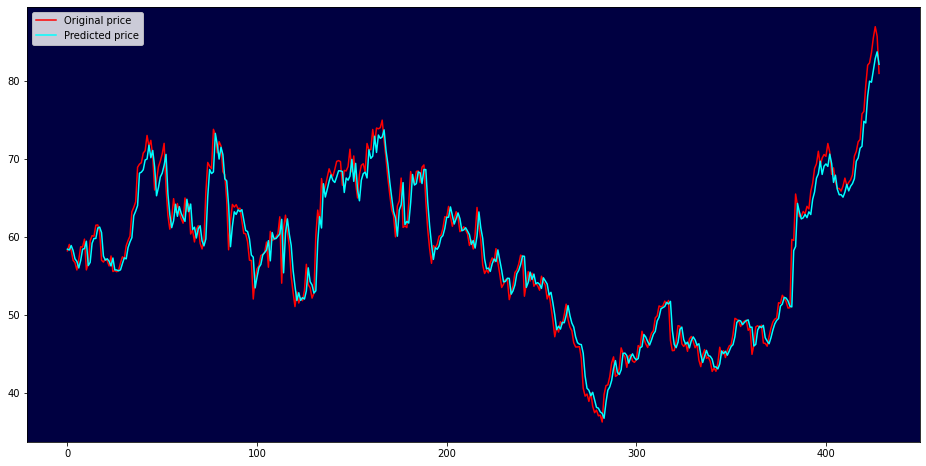

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

MONTE CARLO SIMULATION FOR STOCK PRICE PREDICTION 

In [15]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [51]:
df = pd.read_csv('TSLA.csv', usecols=[0,5])
'''
data = data['Open'].values
data = data.reshape(-1, 1)
data = data.flatten()
#Plot
data.plot(figsize=(15,6))
'''
df['Date'] = pd.to_datetime(df['Date'])
df
#plt.plot(df)

,Date,Adj Close
0,2010-07-01,4.392000
1,2010-07-02,3.840000
2,2010-07-06,3.222000
3,2010-07-07,3.160000
4,2010-07-08,3.492000
...,...,...
2387,2019-12-24,85.050003
2388,2019-12-26,86.188004
2389,2019-12-27,86.075996
2390,2019-12-30,82.940002


**Filter data related to a specified period of time.**

In [52]:
s_date = "1/7/2010"
e_date = "31/7/2016"

filt = (df['Date'] > pd.to_datetime(s_date)) & (df['Date'] < pd.to_datetime(e_date))
# update the dataframe according to filtered dates............................
df_train = df.loc[filt]
df_train = df.loc[filt]["Adj Close"]
print(df_train)

0        4.392000
1        3.840000
2        3.222000
3        3.160000
4        3.492000
          ...    
1526    46.001999
1527    45.902000
1528    45.698002
1529    46.122002
1530    46.958000
Name: Adj Close, Length: 1531, dtype: float64


**Compute the logarithmic return of given data set**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

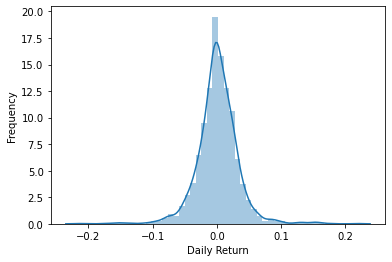

In [53]:
df_hist = df.set_index("Date")
log_return = np.log(1 + df_hist.pct_change())
#Plot
sns.distplot(log_return.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

**Compute the drift of the dataset** <br>
This is formatted as code`<br>
Drift is direction of rates of returns have had in the past. <br>
Drift = Mean - 0.5*Varience <br>
Varience is multiplied by 0.5 because past values erods in the feature. 

In [34]:
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

print(u)
print(var)
print(drift)

Adj Close    0.001233
dtype: float64
Adj Close    0.001038
dtype: float64
Adj Close    0.000714
dtype: float64


**Compute the variance and daily returns** <br>


In [48]:
stdev = log_return.std()
days = 1531
trials = 1000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

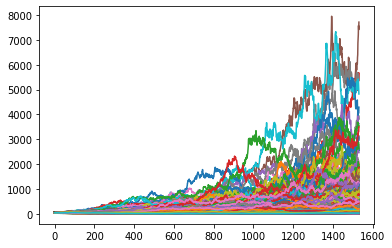

In [49]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = df_train.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

#print(price_paths)
plt.plot(price_paths)

**Section 2**

In [66]:
def beta_sharpe(df, riskfree = 0.025):
    # Beta
    #dd, mark_ret = market_data_combination(df)
    log_ret = np.log(1+df.pct_change())
    covar = log_ret.cov(df)*252  # Annualized
    #covar = pd.DataFrame(covar.iloc[:-1,-1])
    #mrk_var = log_ret.iloc[:,-1].var()*252 #Annualized
    #beta = covar/mrk_var
    beta = covar/covar
    
    stdev_ret = pd.DataFrame(((log_ret.std()*250**0.5)[:-1]), columns=['STD'])
    beta = beta.merge(stdev_ret, left_index=True, right_index=True)
    
    # CAPM
    for i, row in beta.iterrows():
        beta.at[i,'CAPM'] = riskfree + (row[mark_ticker] * (mark_ret-riskfree))
    # Sharpe
    for i, row in beta.iterrows():
        beta.at[i,'Sharpe'] = ((row['CAPM']-riskfree)/(row['STD']))
    beta.rename(columns={"^GSPC":"Beta"}, inplace=True)
    
    return beta

beta_sharpe(df_train)

TypeError: ignored

In [ ]:
def log_returns(data):
    return (np.log(1+data.pct_change()))
#Example use
log_return = log_returns(df_train)

In [ ]:
def drift_calc(data):
    lr = np.log(1+data.pct_change())
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    try:
        return drift.values
    except:
        return drift

drift_calc(df_train)

0.000978348612810959

In [ ]:
def daily_returns(data, days, iterations):
    ft = drift_calc(data)
    try:
        stv = log_returns(data).std().values
    except:
        stv = log_returns(data).std()
    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    return dr
#Example use
daily_returns(df_train, 50, 1000)

array([[0.98933827, 1.0545713 , 1.03217982, ..., 0.98310915, 0.98814821,
        0.9437665 ],
       [0.9737891 , 0.97973254, 1.04168007, ..., 1.00470971, 1.02473286,
        1.02279987],
       [1.030404  , 1.01701581, 0.95784462, ..., 1.01872476, 0.98134379,
        1.01066693],
       ...,
       [1.06323014, 1.00749259, 1.05298265, ..., 1.01631642, 1.06314012,
        1.03466359],
       [0.93549856, 1.02709551, 0.98840092, ..., 1.01928762, 1.00297441,
        0.99537886],
       [1.00717452, 0.99272928, 0.95053885, ..., 0.98558192, 1.0349841 ,
        1.03658385]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


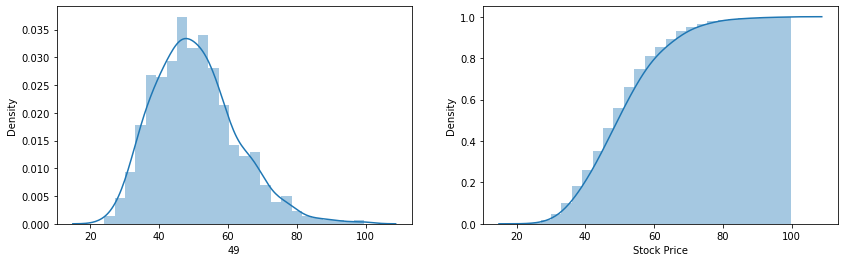

Adj Close
Days: 49
Expected Value: $50.51
Return: 7.04%
Probability of Breakeven: 0.579


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,...,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000,46.958000
1,47.339192,47.046892,50.478282,45.340453,45.556154,46.037025,45.352476,46.752566,48.080736,49.315566,47.727215,47.912521,45.268597,46.791983,48.209562,45.618937,50.467178,46.825380,43.790399,44.802771,44.437718,47.263330,46.764390,46.709827,50.149672,48.960260,49.545985,45.793800,45.525181,47.040620,47.235378,48.175978,47.698695,47.489657,46.908065,45.168840,46.156384,48.847738,47.186789,47.667180,...,45.275955,46.648039,45.875955,46.091556,45.738846,47.312540,47.151455,46.746339,45.242661,45.963871,48.818888,49.779258,49.017974,45.737905,49.969756,47.389158,47.281938,46.703573,44.021408,48.649570,47.562167,47.200348,48.246292,45.720489,46.722018,47.694603,49.010075,47.348288,48.083385,46.564132,46.697675,50.878180,47.500366,47.796229,45.290937,48.710918,45.148778,47.249597,46.968968,45.059103
2,47.479886,46.476851,50.420605,44.429701,44.403456,46.345985,48.913558,49.955299,46.720227,49.860005,49.661591,47.581835,45.940766,47.927517,47.187794,45.037179,48.222638,46.264050,43.708495,45.048865,42.674187,47.389236,49.378657,47.596435,54.344007,47.119599,51.079677,45.843893,44.415325,47.102465,47.715503,50.810668,46.461292,47.474380,49.674431,43.729415,47.136305,50.574835,47.232580,45.669606,...,44.815383,45.934282,48.318422,47.958232,46.712603,45.924806,44.958822,48.421464,45.398269,45.334207,49.922863,48.461360,50.739026,45.339588,48.600851,47.672931,46.152796,44.774050,41.829233,46.415910,49.412686,44.587272,45.782310,44.293600,44.507296,46.365306,50.235577,44.767170,48.000198,46.830012,46.444069,51.634449,47.739120,48.185275,45.680998,49.783327,47.294453,46.903125,47.092255,47.488705
3,48.234685,45.991180,49.526977,43.075798,45.573113,47.123106,49.181065,50.388572,46.559518,51.145057,46.527637,47.254466,46.687651,50.549551,49.257046,45.134366,49.885397,48.152174,44.087586,46.181876,42.419898,49.094764,52.335866,49.382274,53.470237,47.220057,51.026495,46.789848,45.825288,44.609208,48.333710,49.495066,47.891202,45.484392,51.450544,42.634260,50.546765,51.143045,45.953614,49.807751,...,46.080652,46.691104,49.357227,46.408813,46.518985,49.340423,45.563056,51.219178,45.966492,44.011272,51.557199,45.526465,56.709156,44.108896,50.413962,48.834953,46.673061,41.745379,44.028373,46.534366,49.630109,45.308561,44.709187,44.487235,44.063256,47.068056,51.315287,45.993955,46.255785,48.176084,44.200806,54.779043,47.530890,49.445278,46.646533,53.684413,44.728259,48.128916,46.786977,49.498242
4,47.609288,45.445370,52.601752,44.163013,45.132423,47.870044,48.788394,53.275679,44.980464,52.562384,45.278821,45.001600,47.911988,49.964326,47.735005,44.448674,50.445104,48.388600,43.548807,44.178121,39.973202,49.837251,55.723696,53.460021,54.259963,47.339872,47.771289,47.391235,44.524937,45.033289,48.062521,48.875426,50.482031,46.491763,54.297739,43.252038,52.100113,51.621621,46.452437,52.047467,...,47.700048,48.478228,51.774209,48.707288,46.404986,49.502047,44.966978,48.487233,46.597740,42.18

In [ ]:
def simulate_mc(data, days, itr, plot=True):
    # Generate daily returns
    returns = daily_returns(data, days, itr)
    # Create empty matrix
    price_list = np.zeros_like(returns)
    # Put the last actual price in the first row of matrix. 
    price_list[0] = data.iloc[-1]
    # Calculate the price of each day
    for t in range(1,days):
        price_list[t] = price_list[t-1]*returns[t]
    
    # Plot Option
    if plot == True:
        x = pd.DataFrame(price_list).iloc[-1]
        fig, ax = plt.subplots(1,2, figsize=(14,4))
        sns.distplot(x, ax=ax[0])
        sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
        plt.xlabel("Stock Price")
        plt.show()
    
    #CAPM and Sharpe Ratio
    
    # Printing information about stock
    try:
        [print(nam) for nam in data.columns]
    except:
        print(data.name)
    print(f"Days: {days-1}")
    print(f"Expected Value: ${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
    print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
    print(f"Probability of Breakeven: {probs_find(pd.DataFrame(price_list),0, on='return')}")
   
          
    return pd.DataFrame(price_list)
#Example use
simulate_mc(df_train, 50, 1000)

In [ ]:
def probs_find(predicted, higherthan, on = 'value'):
    if on == 'return':
        predicted0 = predicted.iloc[0,0]
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
        less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
    elif on == 'value':
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [i for i in predList if i >= higherthan]
        less = [i for i in predList if i < higherthan]
    else:
        print("'on' must be either value or return")
    return (len(over)/(len(over)+len(less)))
#Example use (probability our investment will return at least 20% over the days specified in our prediction
probs_find(df, 0.2, on = 'return')

1.0

In [ ]:
def monte_carlo(data,iterations, plotten=False):
    #data = import_stock_data(tickers, start=start_date)
    inform = beta_sharpe(data)
    simulatedDF = []
    for t in data:
        y = simulate_mc(data.iloc[:,t], (days_forecast+1), iterations)
        if plotten == True:
            forplot = y.iloc[:,0:10]
            forplot.plot(figsize=(15,4))
        print(f"Beta: {round(inform.iloc[t,inform.columns.get_loc('Beta')],2)}")
        print(f"Sharpe: {round(inform.iloc[t,inform.columns.get_loc('Sharpe')],2)}") 
        print(f"CAPM Return: {round(100*inform.iloc[t,inform.columns.get_loc('CAPM')],2)}%")
        y['ticker'] = tickers[t]
        cols = y.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        y = y[cols]
        simulatedDF.append(y)
    simulatedDF = pd.concat(simulatedDF)
    return simulatedDF

ret_sim_df = monte_carlo(df_train, 252, 10000)

TypeError: ignored